# Evolution of the carbon dioxide emissions over years

<img src="./input/carlos-grury-santos-534439-unsplash.jpg" style="height:500px">

Photo by [Carlos "Grury" Santos](https://unsplash.com/@grury)

---

In [1]:
# needed libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 100)

# Introduction

Carbon dioxide (chemical formula CO 2) [...] is the most significant long-lived greenhouse gas in Earth's atmosphere. Since the Industrial Revolution anthropogenic emissions – primarily from use of fossil fuels and deforestation – `have rapidly increased its concentration in the atmosphere`, leading to global warming [...].

[Source - Wikipedia](https://en.wikipedia.org/wiki/Carbon_dioxide)

__Goal:__ This analysis will show the evolution of CO 2 emissions over the last decades. It's organized in two steps : firstffffffffffffffffffffff, What are the countries with the highest emissions ? 

---

# Different datasets aggregation

## Informations per capita

The dataset `CO2_per_capita.csv` comes from the github repo of [Cabonmap](https://github.com/kiln/carbonmap.org/tree/master/data/Shading/With%20alpha-2) for more infos on where the data come from, please visite their [website](http://www.carbonmap.org/) and graphics which are very instructives. An other dataset can be found [here](https://github.com/open-numbers/ddf--gapminder--co2_emission)

In [3]:
# Load the CSV file  / ParserError: Error tokenizing data. C error: Expected 1 fields in line 1094, saw 2 // with no delimiter
df = pd.read_csv('input/CO2_per_capita.csv', delimiter=';')
df.head()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons)
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN


Columns names are self explanatory.

In [4]:
df.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

## Country codes and continents

This dataset consists of list of countries by continent. Continent codes and country codes are also included.
Credits : [JohnSnowLabs via Datahub.io](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list)

In [5]:
df_continent = pd.read_csv('input/country-and-continent-codes-list-csv_csv.csv')
df_continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [6]:
# select only interesting cols
df_continent = df_continent[['Continent_Name', 'Three_Letter_Country_Code']]
# rename them
df_continent.columns = ['Continent', 'Country Code']
# merge two df
df = pd.merge(df, df_continent, on='Country Code')
df.head()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons),Continent
0,Aruba,ABW,1960,NaN,North America
1,Aruba,ABW,1961,NaN,North America
2,Aruba,ABW,1962,NaN,North America
3,Aruba,ABW,1963,NaN,North America
4,Aruba,ABW,1964,NaN,North America


In [7]:
df_continent.shape

(262, 2)

In [8]:
df_continent.isnull().sum()

Continent       0
Country Code    4
dtype: int64

## Countries population over years

This database presents population and other demographic estimates and projections from 1960 to 2050. They are disaggregated by age-group and sex and covers more than 200 economies.
Here i'll keep only relevant infos for our analysis. The db come from [worldbank.org](https://datacatalog.worldbank.org/dataset/population-estimates-and-projections)

In [9]:
df_population = pd.read_csv('input/Population-EstimatesData.csv')

# keep only total population
df_population = df_population[df_population['Indicator Name'] == 'Population, total']

# keep only corresponding years and remove unecessary cols
df_population = df_population.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050', 'Unnamed: 95'])
df_population.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
166,ARB,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,1.124069e+08,1.156802e+08,1.190165e+08,1.223984e+08,1.258074e+08,1.292694e+08,1.328634e+08,1.366968e+08,1.408433e+08,1.453324e+08,1.501331e+08,1.551837e+08,1.603925e+08,1.656895e+08,1.710520e+08,1.764901e+08,1.820058e+08,1.876108e+08,1.933103e+08,1.990938e+08,2.049425e+08,2.108448e+08,2.167874e+08,2.247354e+08,2.308299e+08,2.350372e+08,2.412861e+08,2.474359e+08,2.550297e+08,2.608435e+08,2.665751e+08,2.722351e+08,2.779629e+08,2.838320e+08,2.898504e+08,2.960266e+08,3.024345e+08,3.091620e+08,3.162647e+08,3.237733e+08,3.316538e+08,3.398255e+08,3.481451e+08,3.565089e+08,3.648959e+08
341,CSS,4.198307e+06,4.277802e+06,4.357746e+06,4.436804e+06,4.513246e+06,4.585777e+06,4.653919e+06,4.718167e+06,4.779624e+06,4.839881e+06,4.900059e+06,4.960647e+06,5.021359e+06,5.082049e+06,5.142246e+06,5.201705e+06,5.260062e+06,5.317542e+06,5.375393e+06,5.435143e+06,5.497756e+06,5.564200e+06,5.633661e+06,5.702754e+06,5.766957e+06,5.823242e+06,5.870023e+06,5.908886e+06,5.943661e+06,5.979907e+06,6.021614e+06,6.070204e+06,6.124265e+06,6.181538e+06,6.238576e+06,6.292827e+06,6.343683e+06,6.392040e+06,6.438587e+06,6.484510e+06,6.530691e+06,6.577216e+06,6.623792e+06,6.670276e+06,6.716373e+06,6.761932e+06,6.806838e+06,6.851221e+06,6.895315e+06,6.939534e+06,6.984096e+06,7.029022e+06
516,CEB,9.140176e+07,9.223274e+07,9.300950e+07,9.384002e+07,9.471580e+07,9.544099e+07,9.614634e+07,9.704327e+07,9.788402e+07,9.860663e+07,9.913455e+07,9.963526e+07,1.003572e+08,1.011127e+08,1.019399e+08,1.028606e+08,1.037761e+08,1.046169e+08,1.053294e+08,1.059486e+08,1.065767e+08,1.071915e+08,1.077700e+08,1.083261e+08,1.088535e+08,1.093607e+08,1.098466e+08,1.102964e+08,1.106867e+08,1.108016e+08,1.107431e+08,1.104695e+08,1.101115e+08,1.100419e+08,1.100216e+08,1.098642e+08,1.096262e+08,1.094220e+08,1.092383e+08,1.090610e+08,1.084478e+08,1.076600e+08,1.069598e+08,1.066242e+08,1.063317e+08,1.060419e+08,1.057725e+08,1.053787e+08,1.050019e+08,1.048005e+08,1.044214e+08,1.041740e+08
691,EAR,9.792874e+08,1.002524e+09,1.026587e+09,1.051415e+09,1.077037e+09,1.103433e+09,1.130587e+09,1.158571e+09,1.187274e+09,1.216766e+09,1.247053e+09,1.278138e+09,1.310016e+09,1.342709e+09,1.376073e+09,1.410094e+09,1.444720e+09,1.480010e+09,1.516216e+09,1.553704e+09,1.592674e+09,1.633180e+09,1.675079e+09,1.718098e+09,1.761829e+09,1.805996e+09,1.850487e+09,1.895290e+09,1.940220e+09,1.985084e+09,2.031828e+09,2.076398e+09,2.120567e+09,2.164508e+09,2.208444e+09,2.252579e+09,2.297015e+09,2.341634e+09,2.386185e+09,2.430487e+09,2.474601e+09,2.518353e+09,2.561813e+09,2.605067e+09,2.648272e+09,2.691528e+09,2.734860e+09,2.778276e+09,2.821797e+09,2.865440e+09,2.909411e+09,2.953406e+09
866,EAS,1.040034e+09,1.043597e+09,1.058046e+09,1.083797e+09,1.109192e+09,1.135651e+09,1.165546e+09,1.194209e+09,1.223467e+09,1.256390e+09,1.289320e+09,1.323021e+09,1.354873e+09,1.385130e+09,1.415205e+09,1.442315e+09,1.466537e+09,1.489432e+09,1.512228e+09,1.535457e+09,1.558242e+09,1.581867e+09,1.607789e+09,1.633686e+09,1.658311e+09,1.683505e+09,1.710226e+09,1.738329e+09,1.766707e+09,1.794458e+09,1.821518e+09,1.847580e+09,1.871877e+09,1.895331e+09,1.918823e+09,1.941909e+09,1.964618e+09,1.986766e+09,2.008138e+09,2.028093e+09,2.047139e+09,2.065520e+09,2.082948e+09,2.099537e+09,2.115551e+09,2.131356e+09,2.147021e+09,2.162088e+09,2.177418e+09,2.192343e+09,2.207155e+09,2.221935e+09


In [10]:
df_population.shape

(259, 53)

There are many missing value here, so a little cleaning is needed first

In [11]:
#df_population.isnull().sum()
#df_population[df_population['1960'].isnull()]

In [12]:
df_population = df_population.drop(index=5066)

cols_with_nan = ['1960', '1961', '1962', '1963', '1964', 
    '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', 
    '1978', '1979', '1980', '1981', '1982', '1983', '1984','1985', '1986', '1987', '1988', '1989']
idx = [36916, 44791]
    
df_population.loc[idx, cols_with_nan] = df_population.loc[idx, '1990']

In [13]:
df_population.loc[37616] = df_population.loc[37616].fillna(df_population.loc[37616, '1998'])

In [14]:
df_population = df_population.melt(id_vars=["Country Code"], 
            #value_vars :  Column(s) to unpivot. If not specified, uses all columns that are not set as `id_vars`. 
            value_name="Population")

# Create a unique key for future join
#df_population['key'] = df_population['Country Code'] + str(df_population['variable'])
#df_population.head()

In [15]:
df_population = df_population.rename(index=str, columns={"variable": "Year"})
df_population.Year = df_population.Year.astype('int')
df_population.head()

,Country Code,Year,Population
0,ARB,1960,9.249093e+07
1,CSS,1960,4.198307e+06
2,CEB,1960,9.140176e+07
3,EAR,1960,9.792874e+08
4,EAS,1960,1.040034e+09


Aggregation of all datasets

In [16]:
df = pd.merge(df, df_population, on=['Country Code', 'Year'])
df.head()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons),Continent,Population
0,Aruba,ABW,1960,NaN,North America,54211.0
1,Aruba,ABW,1961,NaN,North America,55438.0
2,Aruba,ABW,1962,NaN,North America,56225.0
3,Aruba,ABW,1963,NaN,North America,56695.0
4,Aruba,ABW,1964,NaN,North America,57032.0


In [17]:
# let's check values
#temp[temp['Country Name'] == 'France']

# First insights / data cleaning

Number of lines, types of values, irrelevant or weird values...

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11388 entries, 0 to 11387
Data columns (total 6 columns):
Country Name                    11388 non-null object
Country Code                    11388 non-null object
Year                            11388 non-null int64
CO2 Per Capita (metric tons)    9233 non-null float64
Continent                       11388 non-null object
Population                      11385 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 622.8+ KB


In [19]:
df.shape

(11388, 6)

In [20]:
df.duplicated().sum()

0

In [21]:
df.loc[[2650, 2651, 10502, 10503]]

,Country Name,Country Code,Year,CO2 Per Capita (metric tons),Continent,Population
2650,Cyprus,CYP,2011,6.735376,Europe,1124835.0
2651,Cyprus,CYP,2011,6.735376,Asia,1124835.0
10502,Turkey,TUR,2011,4.383105,Europe,73409455.0
10503,Turkey,TUR,2011,4.383105,Asia,73409455.0


In [22]:
df = df.drop(index=[2651, 10503])
df.shape

(11386, 6)

In [23]:
df.isnull().sum()

Country Name                       0
Country Code                       0
Year                               0
CO2 Per Capita (metric tons)    2155
Continent                          0
Population                         3
dtype: int64

In [24]:
# Nb of different countries
df['Country Name'].nunique()

212

In [25]:
# Nb of years
df['Year'].nunique()

52

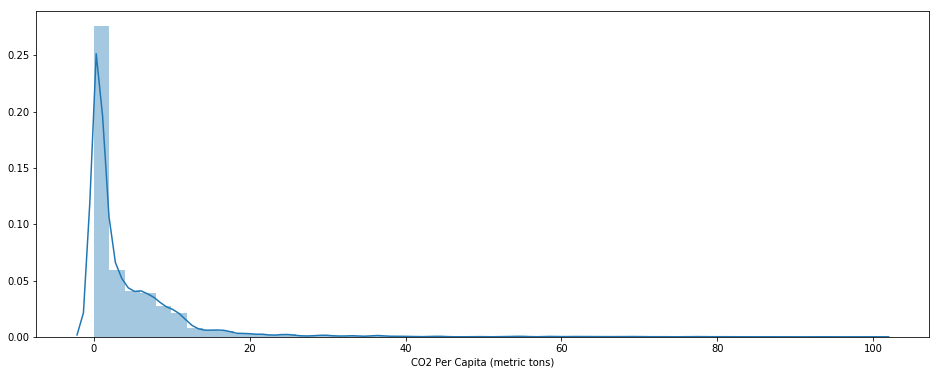

In [26]:
plt.figure(figsize=(16, 6))
sns.distplot(df['CO2 Per Capita (metric tons)'].dropna())
# same thing but longer
#sns.distplot(df[df['CO2 Per Capita (metric tons)'].notnull()]['CO2 Per Capita (metric tons)'])
plt.show()

* At first glance, there are many years/countries with little emissions while very few countries seem to produce a lot of CO2... Let's check this later with other plots.
* There is not any abnormal negative values. Now, where are the missing values i.e in which countries are there only missing values ? What is the proportion of Nan per country...

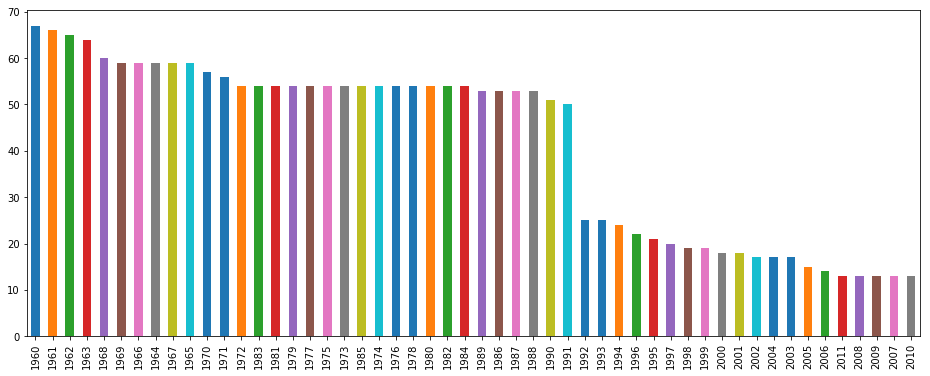

In [27]:
df[df['CO2 Per Capita (metric tons)'].isna()]['Year'].value_counts().plot(kind='bar', figsize=(16, 6))

It seems that emissions were not fully recorded before the 90's... Let's dig a little deeper.

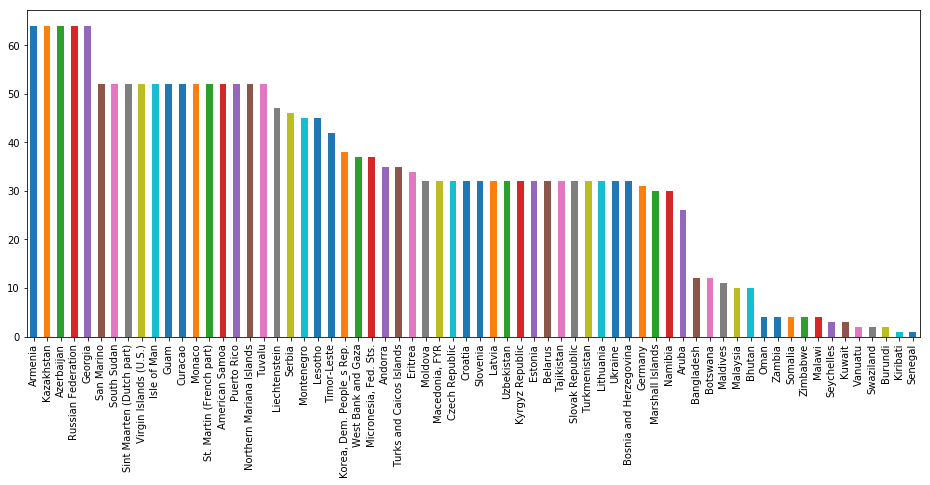

In [28]:
# Countries by number of missing values - there are 52 years in the record
df[df['CO2 Per Capita (metric tons)'].isna()]['Country Name'].value_counts().plot(kind='bar', figsize=(16, 6))

On the bar plot above, one can see that 
* exept Ukraine, Russia, Croatia, Germany
* countries with at least 20 missing values for 52 years of record are not big countries.

Therefore, they can be omitted in our analysis.

In [29]:
# retrieve countries with a least 20 years of missing values
temp_df = df[df['CO2 Per Capita (metric tons)'].isna()]['Country Name'].value_counts() > 20
countries_with_na = pd.DataFrame(temp_df).index
countries_with_na

Index(['Armenia', 'Kazakhstan', 'Azerbaijan', 'Russian Federation', 'Georgia',
       'San Marino', 'South Sudan', 'Sint Maarten (Dutch part)',
       'Virgin Islands (U.S.)', 'Isle of Man', 'Guam', 'Curacao', 'Monaco',
       'St. Martin (French part)', 'American Samoa', 'Puerto Rico',
       'Northern Mariana Islands', 'Tuvalu', 'Liechtenstein', 'Serbia',
       'Montenegro', 'Lesotho', 'Timor-Leste', 'Korea, Dem. People_s Rep.',
       'West Bank and Gaza', 'Micronesia, Fed. Sts.', 'Andorra',
       'Turks and Caicos Islands', 'Eritrea', 'Moldova', 'Macedonia, FYR',
       'Czech Republic', 'Croatia', 'Slovenia', 'Latvia', 'Uzbekistan',
       'Kyrgyz Republic', 'Estonia', 'Belarus', 'Tajikistan',
       'Slovak Republic', 'Turkmenistan', 'Lithuania', 'Ukraine',
       'Bosnia and Herzegovina', 'Germany', 'Marshall Islands', 'Namibia',
       'Aruba', 'Bangladesh', 'Botswana', 'Maldives', 'Malaysia', 'Bhutan',
       'Oman', 'Zambia', 'Somalia', 'Zimbabwe', 'Malawi', 'Seychelles',
 

In [30]:
# removing countries with more than 20 missing values
df = df[~df['Country Name'].isin(countries_with_na)]
df.shape

(7694, 6)

In [31]:
# filling remaining missing values with an interpolation 
df = df.interpolate()

In [32]:
# check if there isn't any Nan anymore
df.isnull().sum()

Country Name                    0
Country Code                    0
Year                            0
CO2 Per Capita (metric tons)    0
Continent                       0
Population                      0
dtype: int64

---

# Analysis per capita

## Which countries have the highest emissions historically ?

In [33]:
df_hist = pd.DataFrame(df.groupby(by='Country Name', as_index=False)['CO2 Per Capita (metric tons)'].mean())
df_hist = df_hist.sort_values(by=['CO2 Per Capita (metric tons)'], ascending=False)
df_hist.head()

,Country Name,CO2 Per Capita (metric tons)
111,Qatar,54.423341
139,United Arab Emirates,31.844877
82,Luxembourg,28.196509
17,Brunei Darussalam,21.497854
9,Bahrain,19.867874


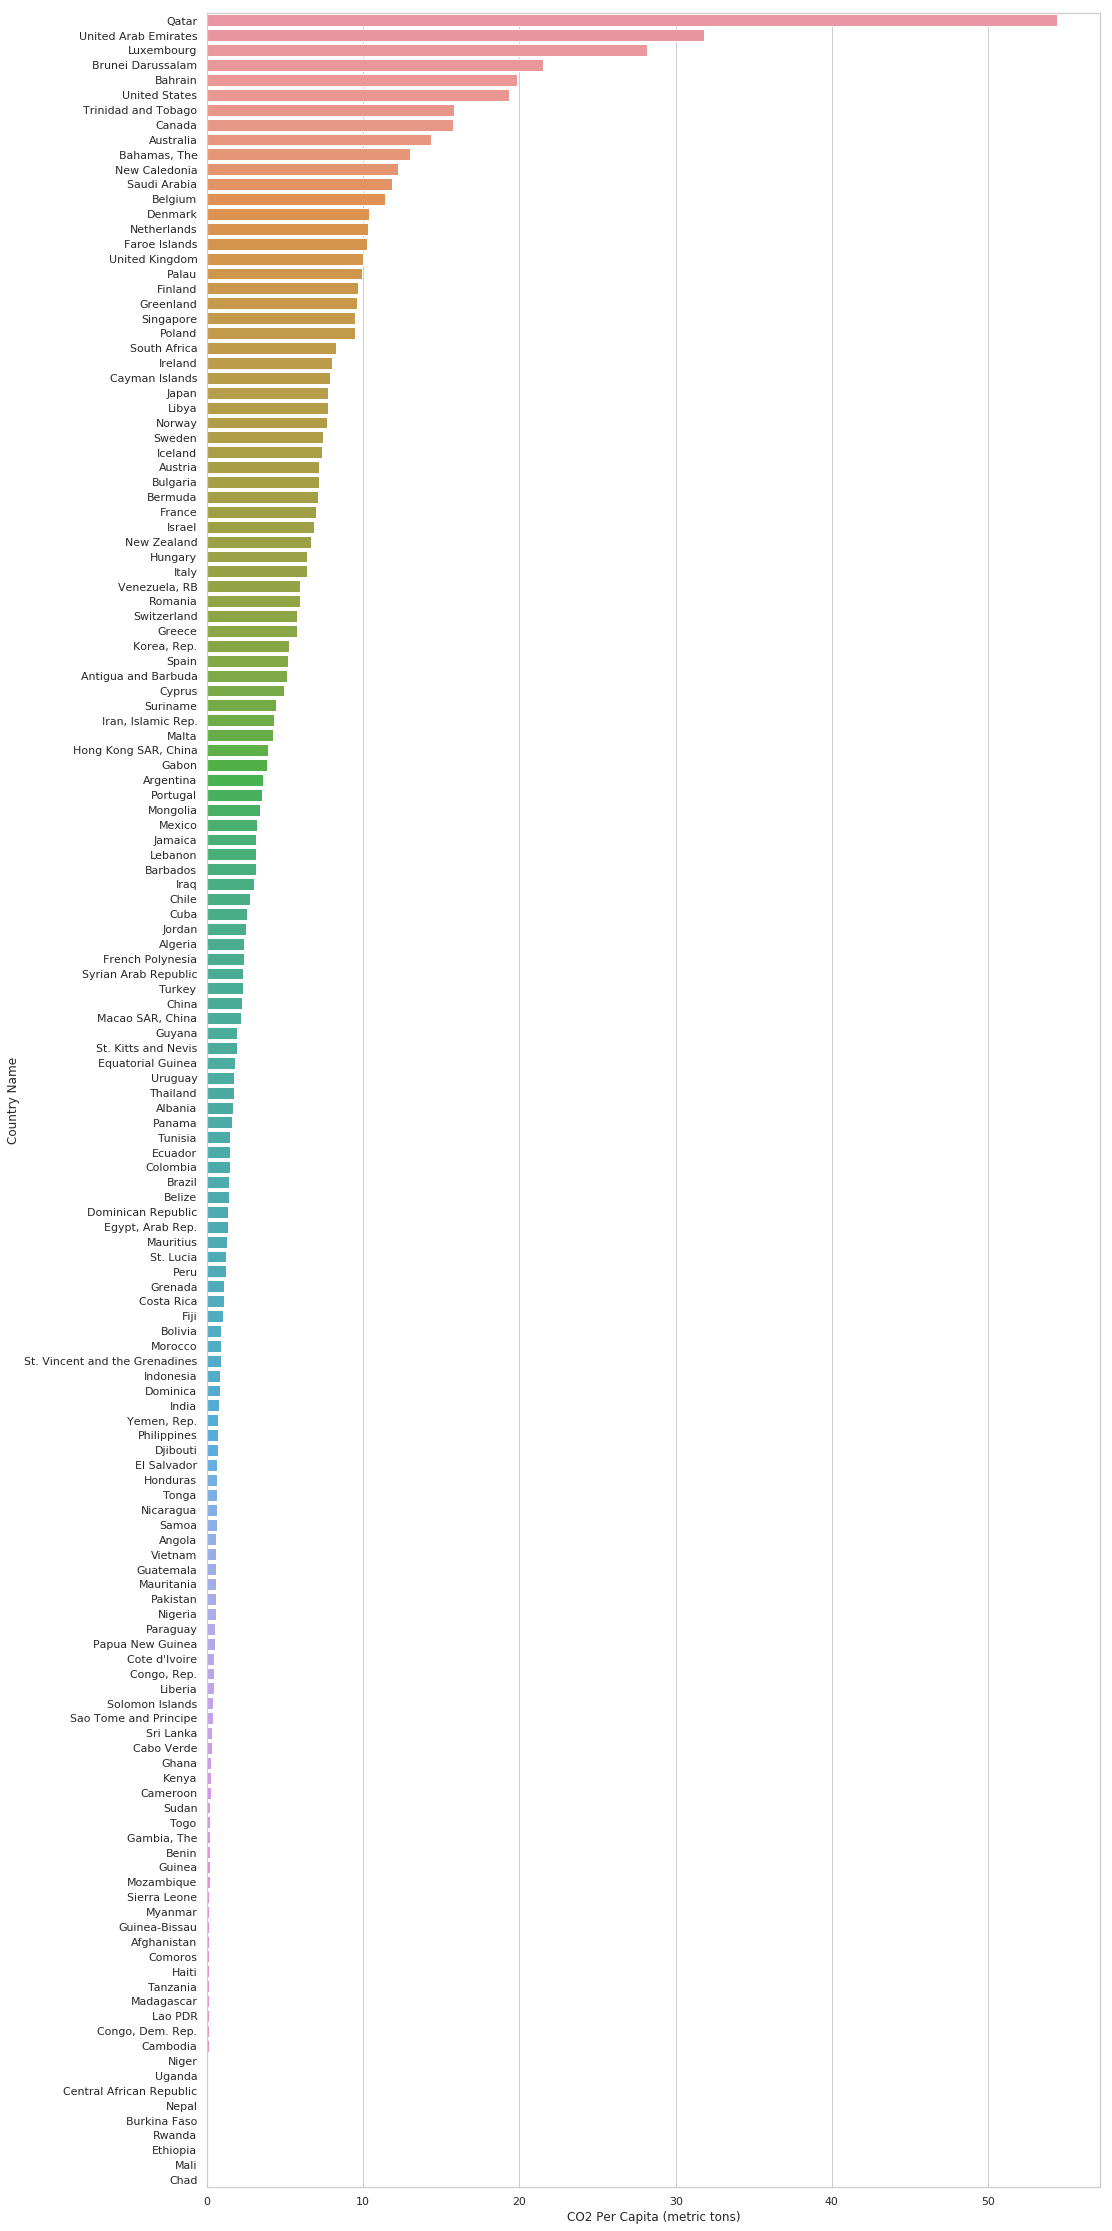

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 40))
sns.barplot(x="CO2 Per Capita (metric tons)", 
            y="Country Name", 
            data=df_hist)
plt.show()

## Which countries have the highest emissions lately ?

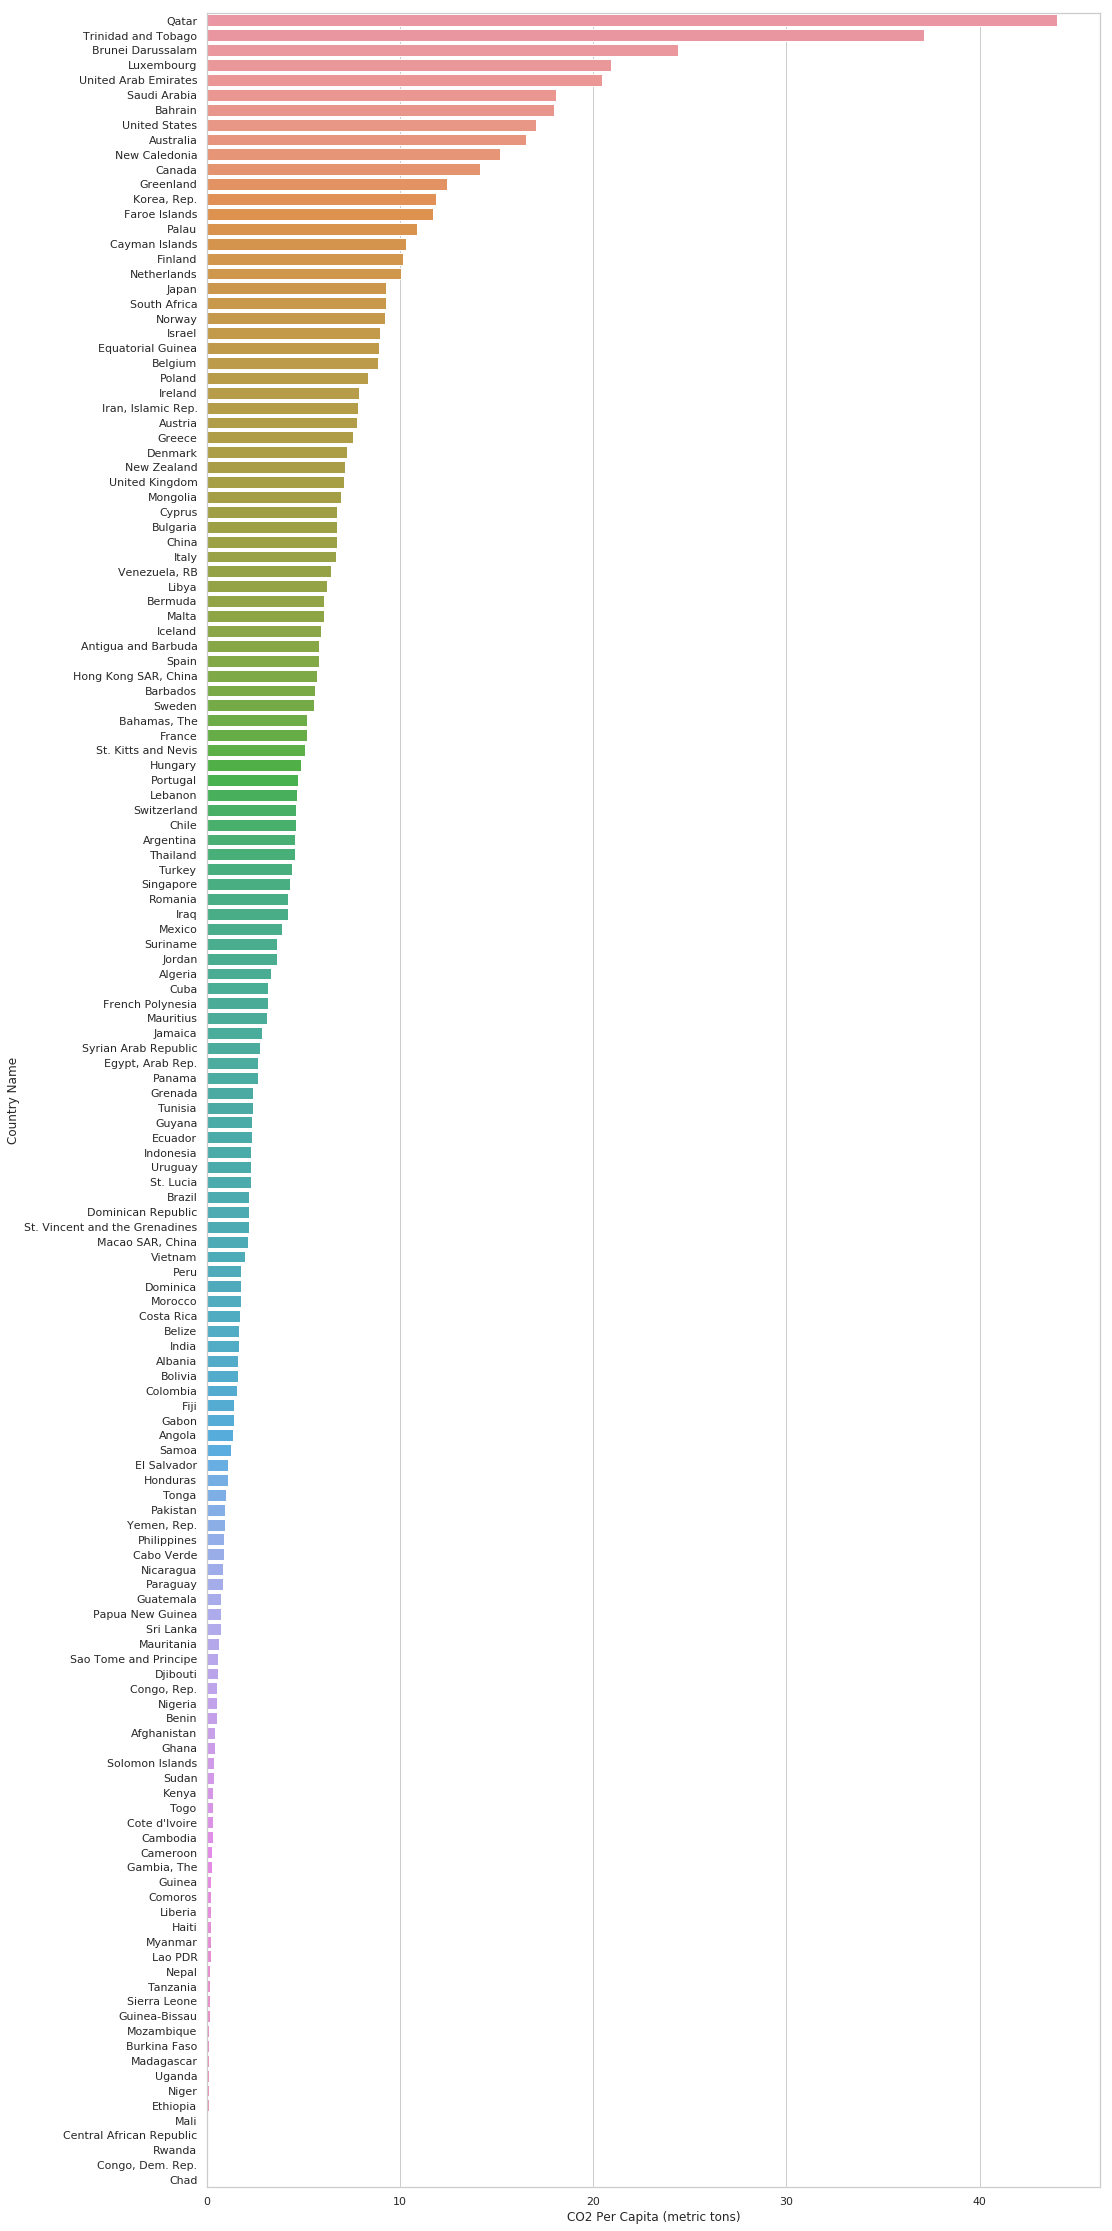

In [35]:
# for instance in year 2011
df_lately = df[df.Year == 2011]
df_lately = df_lately.sort_values(by=['CO2 Per Capita (metric tons)'], ascending=False)
plt.figure(figsize=(16, 40))
ax = sns.barplot(x="CO2 Per Capita (metric tons)", y="Country Name", data=df_lately)

## Are the annual emissions decreasing or increasing ?
Let's select few countries to show the evolution 

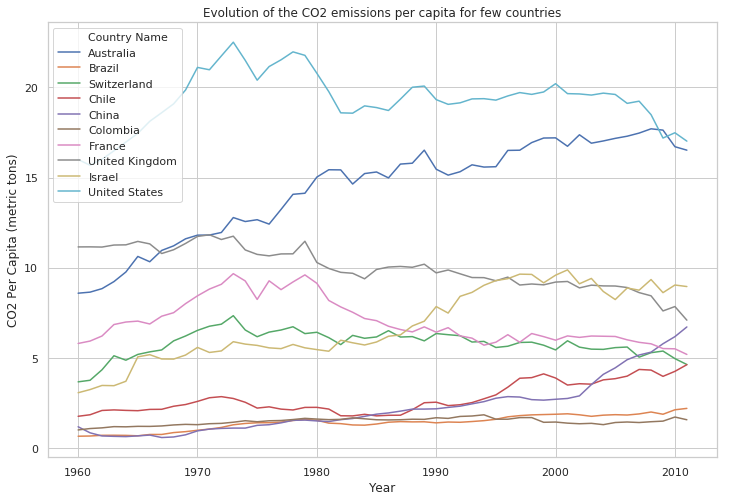

In [36]:
selected_countries = ['France', 'Israel', 'Switzerland', 'Chile', 'China', 
                      'Colombia', 'United Kingdom', 'United States', 'Brazil', 'Australia']
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", 
             y="CO2 Per Capita (metric tons)", 
             hue="Country Name", 
             data=df[df["Country Name"].isin(selected_countries)])
plt.title('Evolution of the CO2 emissions per capita for few countries')
plt.show()

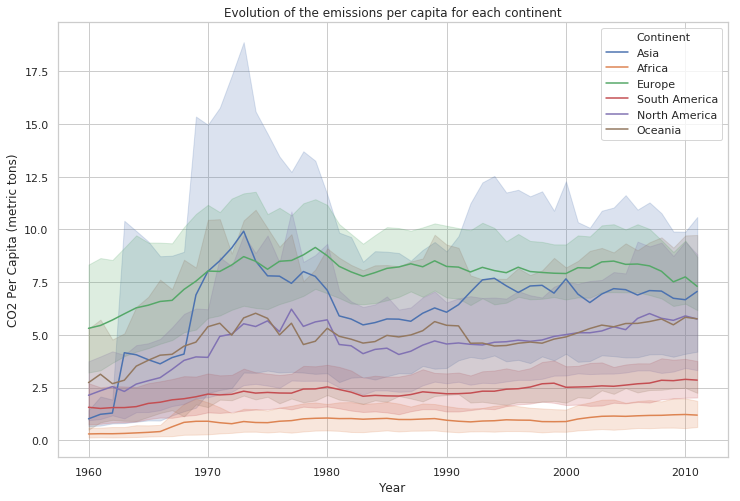

In [37]:
plt.figure(figsize=(12, 8))
plt.title('Evolution of the emissions per capita for each continent')

sns.lineplot(x="Year", 
             y="CO2 Per Capita (metric tons)", 
             hue="Continent", 
             data=df)

plt.show()

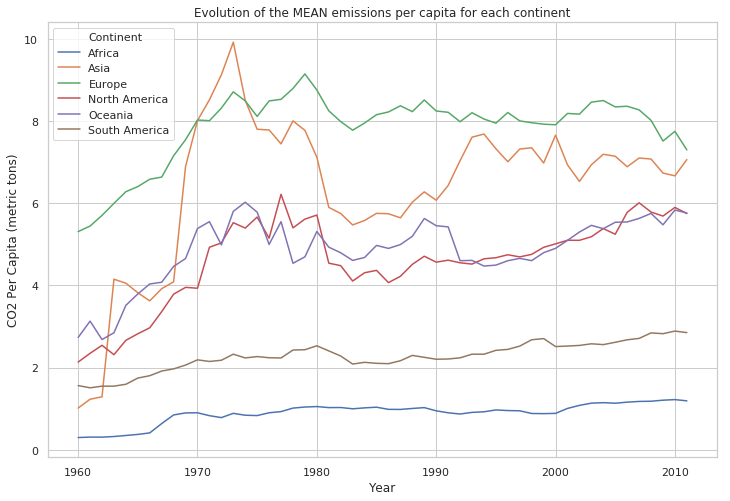

In [38]:
df_mean = pd.DataFrame(df.groupby(by=['Continent', 'Year'], as_index=False)['CO2 Per Capita (metric tons)'].mean())

plt.figure(figsize=(12, 8))
plt.title('Evolution of the MEAN emissions per capita for each continent')

sns.lineplot(x="Year", 
             y="CO2 Per Capita (metric tons)", 
             hue="Continent", 
             data=df_mean)

plt.show()

In [39]:
df_mean.head()

,Continent,Year,CO2 Per Capita (metric tons)
0,Africa,1960,0.298993
1,Africa,1961,0.310182
2,Africa,1962,0.308247
3,Africa,1963,0.323735
4,Africa,1964,0.348756


## Evolution of emission share

In [40]:
df_mean_pivot = pd.pivot_table(df_mean, index='Year', values='CO2 Per Capita (metric tons)', columns='Continent')
df_mean_pivot.head()

Continent,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,
1960,0.298993,1.015958,5.310022,2.134758,2.734202,1.563707
1961,0.310182,1.230886,5.445797,2.348035,3.131762,1.508886
1962,0.308247,1.290272,5.703817,2.543537,2.683807,1.549366
1963,0.323735,4.151895,5.997686,2.315408,2.848258,1.549151
1964,0.348756,4.054674,6.281629,2.664622,3.515654,1.595202


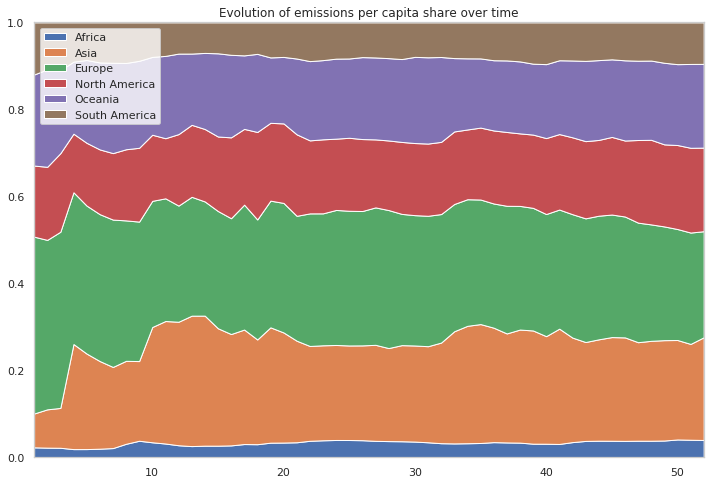

In [41]:
df_mean_perc = df_mean_pivot.divide(df_mean_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))

# Make the plot
plt.stackplot(range(1,53),
              df_mean_perc['Africa'], 
              df_mean_perc["Asia"], 
              df_mean_perc["Europe"],
              df_mean_perc["North America"],
              df_mean_perc["Oceania"],
              df_mean_perc["South America"],
              labels=['Africa','Asia','Europe','North America','Oceania','South America'])

# Formatting the plot
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Evolution of emissions per capita share over time')
plt.show()

## World map

In [42]:
# create a map
m = folium.Map()

In [43]:
countries_list = list(df["Country Name"].unique())

# removing names that are not recognized by the API
rem = ['Congo, Dem. Rep.', 'Congo, Rep.', 'Egypt, Arab Rep.', 'French Polynesia', 'Hong Kong SAR, China',
      'Iran, Islamic Rep.', 'Korea, Rep.', 'Lao PDR', 'Macao SAR, China', 'New Caledonia', 'Philippines', 
       'Venezuela, RB', 'Yemen, Rep.']

for c in rem:
    countries_list.remove(c)
    
countries_list.sort()
countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas, The',
 'Bahrain',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Lebanon',
 'Liberia',
 'Libya',
 'Luxembourg',
 'Madagasc

In [44]:
def get_boundingbox_country(country, output_as='boundingbox'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

# Example
print("Coordinates of France are long={} and lat={}".format(
            get_boundingbox_country("El Salvador", output_as="center")[0],
            get_boundingbox_country("El Salvador", output_as="center")[1]))

Coordinates of France are long=13.8000382 and lat=-88.9140683


In [45]:
df_lately[df_lately['Country Name'] == 'Turkey']['CO2 Per Capita (metric tons)']

10502    4.383105
Name: CO2 Per Capita (metric tons), dtype: float64

In [46]:
for country in countries_list:
    resp = get_boundingbox_country(country)
    long, lat = resp[0], resp[1]
    emission = float(df_lately[df_lately['Country Name'] == country]['CO2 Per Capita (metric tons)'].values)
    folium.Circle(
                location=[long, lat],
                popup=country,
                radius=100 * emission
                ).add_to(m)

In [47]:
m

# Analysis per whole country emission

## Which countries have the highest emissions historically ?

In [48]:
df['Whole emission'] = df['CO2 Per Capita (metric tons)'] * df['Population']
df.head()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons),Continent,Population,Whole emission
52,Afghanistan,AFG,1960,0.046068,Asia,8996351.0,414442.773324
53,Afghanistan,AFG,1961,0.053615,Asia,9166764.0,491475.529354
54,Afghanistan,AFG,1962,0.073781,Asia,9345868.0,689550.645811
55,Afghanistan,AFG,1963,0.074251,Asia,9533954.0,707909.126949
56,Afghanistan,AFG,1964,0.086317,Asia,9731361.0,839977.440205


In [49]:
df_hist = pd.DataFrame(df.groupby(by='Country Name', as_index=False)['Whole emission'].mean())
df_hist = df_hist.sort_values(by=['Whole emission'], ascending=False)
df_hist.head()

,Country Name,Whole emission
141,United States,4.699988e+09
28,China,2.639401e+09
74,Japan,9.278755e+08
66,India,7.040976e+08
140,United Kingdom,5.702256e+08


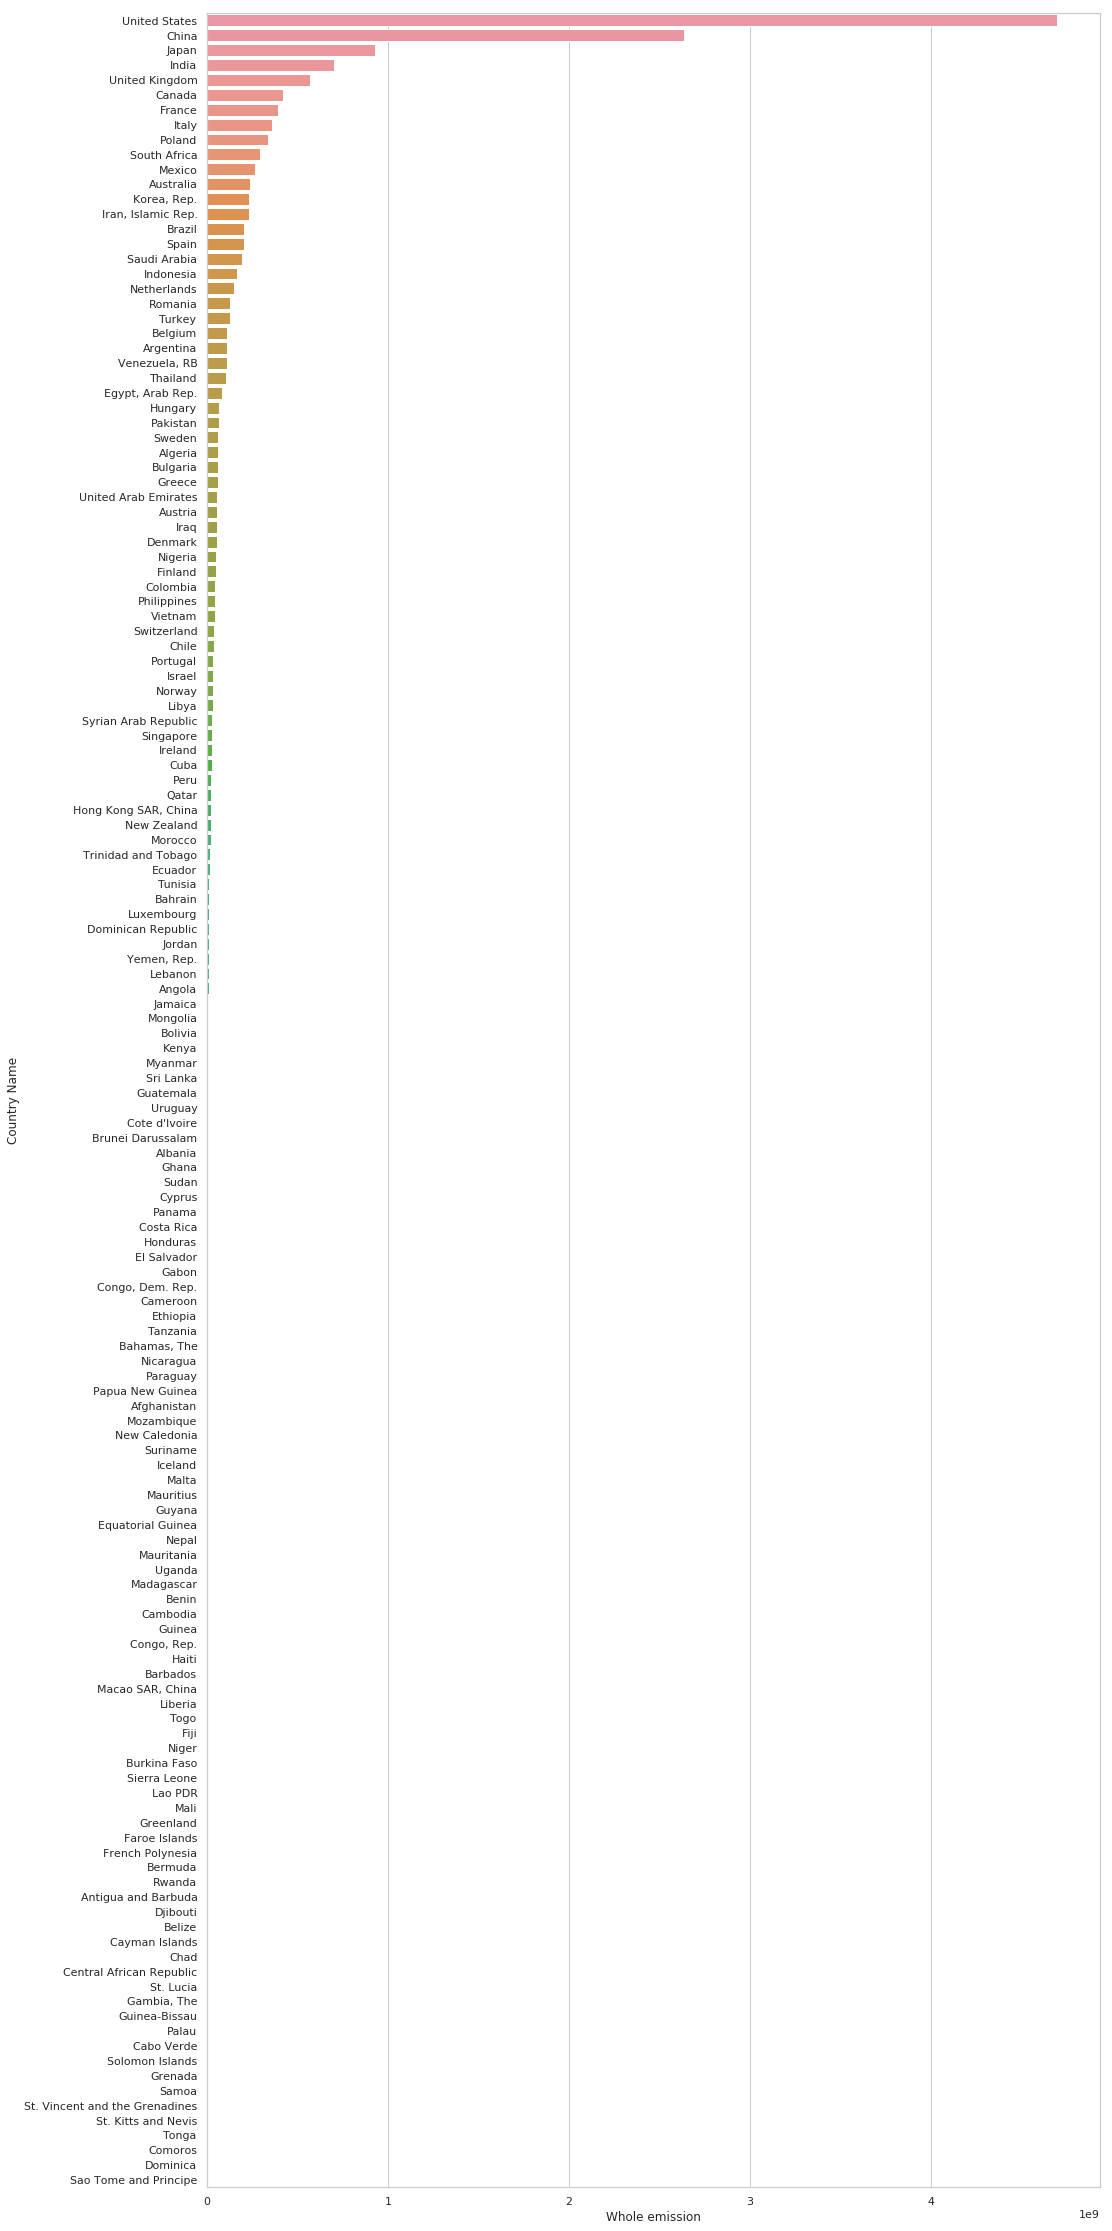

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 40))
sns.barplot(x="Whole emission", 
            y="Country Name", 
            data=df_hist)
plt.show()

## Which countries have the highest emissions lately ?

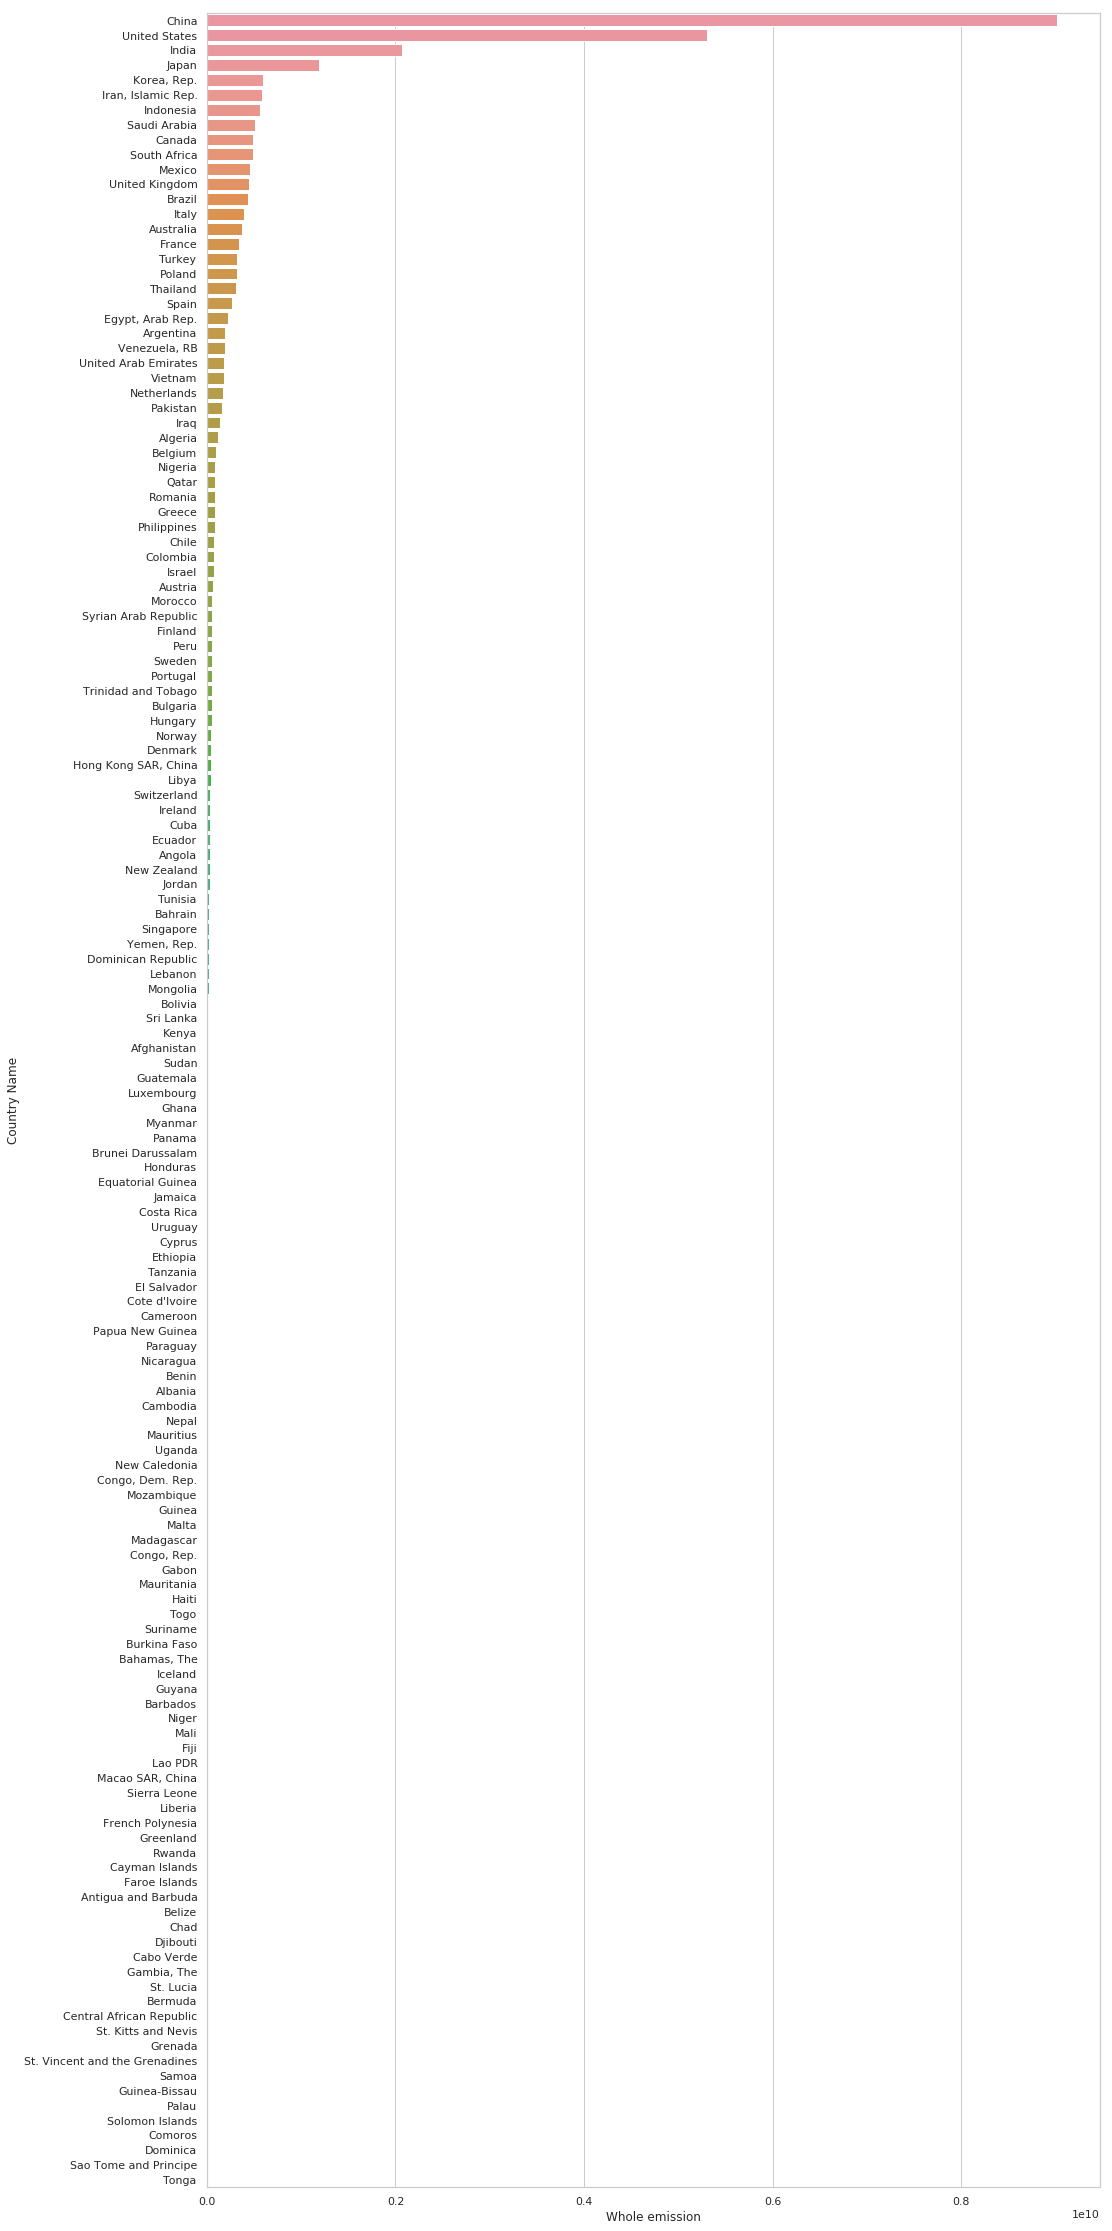

In [51]:
# for instance in year 2011
df_lately = df[df.Year == 2011]
df_lately = df_lately.sort_values(by=['Whole emission'], ascending=False)
plt.figure(figsize=(16, 40))
sns.barplot(x='Whole emission', y="Country Name", data=df_lately)
plt.show()

## Are the annual emissions decreasing or increasing ?
Let's select few countries to show the evolution

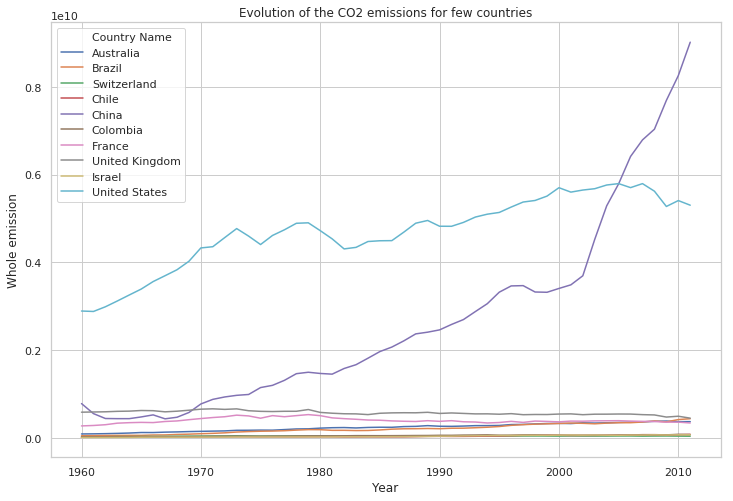

In [52]:
selected_countries = ['France', 'Israel', 'Switzerland', 'Chile', 'China', 
                      'Colombia', 'United Kingdom', 'United States', 'Brazil', 'Australia']
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", 
             y='Whole emission', 
             hue="Country Name", 
             data=df[df["Country Name"].isin(selected_countries)])
plt.title('Evolution of the CO2 emissions for few countries')
plt.show()

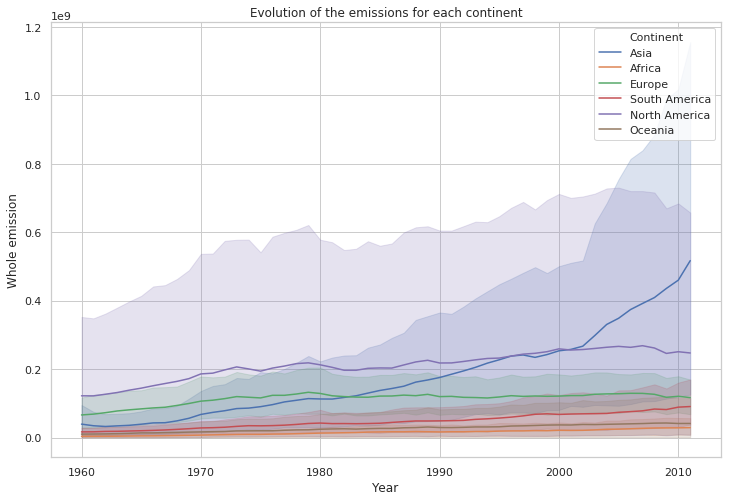

In [53]:
plt.figure(figsize=(12, 8))
plt.title('Evolution of the emissions for each continent')

sns.lineplot(x="Year", 
             y='Whole emission', 
             hue="Continent", 
             data=df)
plt.show()

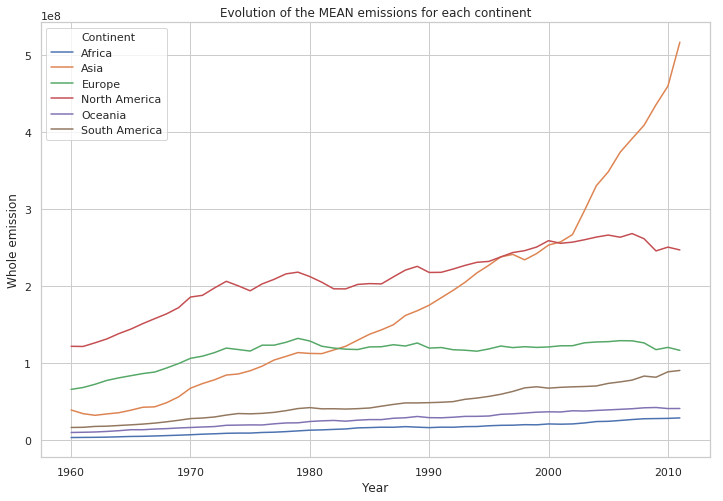

In [54]:
df_mean = pd.DataFrame(df.groupby(by=['Continent', 'Year'], as_index=False)['Whole emission'].mean())

plt.figure(figsize=(12, 8))
plt.title('Evolution of the MEAN emissions for each continent')

sns.lineplot(x="Year", 
             y='Whole emission', 
             hue="Continent", 
             data=df_mean)

plt.show()

## Evolution of emission share

In [55]:
df_mean_pivot = pd.pivot_table(df_mean, index='Year', values='Whole emission', columns='Continent')
df_mean_pivot.head()

Continent,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,
1960,3.536444e+06,3.928689e+07,6.609129e+07,1.219828e+08,1.010739e+07,1.660111e+07
1961,3.695651e+06,3.453619e+07,6.850683e+07,1.217903e+08,1.037739e+07,1.681596e+07
1962,3.804803e+06,3.239489e+07,7.269145e+07,1.265432e+08,1.072653e+07,1.796754e+07
1963,4.057752e+06,3.418465e+07,7.773613e+07,1.316383e+08,1.145539e+07,1.827552e+07
1964,4.494858e+06,3.575509e+07,8.103279e+07,1.384992e+08,1.240671e+07,1.917087e+07


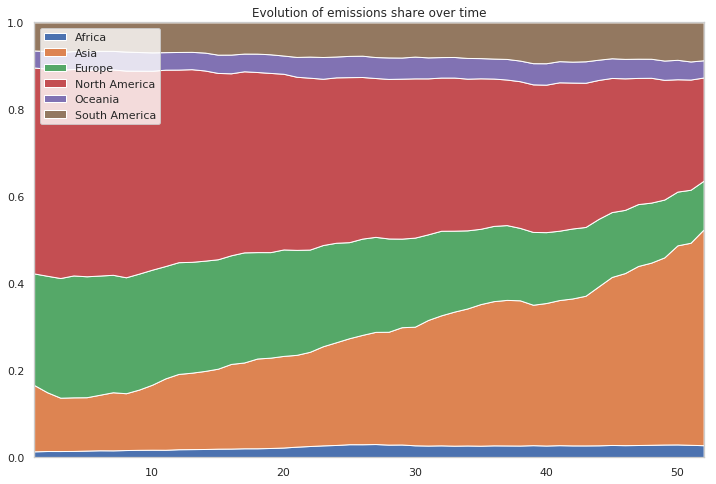

In [56]:
df_mean_perc = df_mean_pivot.divide(df_mean_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))

# Make the plot
plt.stackplot(range(1,53),
              df_mean_perc['Africa'], 
              df_mean_perc["Asia"], 
              df_mean_perc["Europe"],
              df_mean_perc["North America"],
              df_mean_perc["Oceania"],
              df_mean_perc["South America"],
              labels=['Africa','Asia','Europe','North America','Oceania','South America'])

# Formatting the plot
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Evolution of emissions share over time')
plt.show()

## World map